In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_cachua=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
training_set=train_cachua.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/data/cachua/train',
                                               target_size=(150,150), batch_size=32, class_mode='categorical')
validation=train_cachua.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/data/cachua/test',
                                             target_size=(150,150), batch_size=32, class_mode='categorical')


Found 3000 images belonging to 10 classes.
Found 635 images belonging to 10 classes.


In [ ]:
print(training_set.class_indices,validation.class_indices)

{'Tomato___Bacterial_spot': 0, 'Tomato___Early_blight': 1, 'Tomato___Late_blight': 2, 'Tomato___Leaf_Mold': 3, 'Tomato___Septoria_leaf_spot': 4, 'Tomato___Spider_mites Two-spotted_spider_mite': 5, 'Tomato___Target_Spot': 6, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7, 'Tomato___Tomato_mosaic_virus': 8, 'Tomato___healthy': 9} {'Tomato___Bacterial_spot': 0, 'Tomato___Early_blight': 1, 'Tomato___Late_blight': 2, 'Tomato___Leaf_Mold': 3, 'Tomato___Septoria_leaf_spot': 4, 'Tomato___Spider_mites Two-spotted_spider_mite': 5, 'Tomato___Target_Spot': 6, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7, 'Tomato___Tomato_mosaic_virus': 8, 'Tomato___healthy': 9}


In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 3 tín hiệu ra
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 500 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), khi sai số không thay đổi trong 30 lần học thì sẽ␣ dừng học 
history=model.fit(training_set,epochs=500,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/500
94/94 [==============================] - 2053s 22s/step - loss: 2.1093 - accuracy: 0.2973 - val_loss: 1.5778 - val_accuracy: 0.4520
Epoch 2/500
94/94 [==============================] - 29s 309ms/step - loss: 1.3339 - accuracy: 0.5460 - val_loss: 1.3518 - val_accuracy: 0.5354
Epoch 3/500
94/94 [==============================] - 30s 320ms/step - loss: 1.1696 - accuracy: 0.5830 - val_loss: 1.1404 - val_accuracy: 0.5827
Epoch 4/500
94/94 [==============================] - 29s 310ms/step - loss: 0.9318 - accuracy: 0.6770 - val_loss: 0.9715 - val_accuracy: 0.6583
Epoch 5/500
94/94 [==============================] - 29s 305ms/step - loss: 0.8026 - accuracy: 0.7173 - val_loss: 0.8450 - val_accuracy: 0.7244
Epoch 6/500
94/94 [==============================] - 29s 306ms/step - loss: 0.7115 - accuracy: 0.7593 - val_loss: 0.7575 - val_accuracy: 0.7606
Epoch 7/500
94/94 [==============================] - 28s 301ms/step - loss: 0.6180 - accuracy: 0.7860 - val_loss: 0.8696 - val_accuracy:

In [ ]:
model.save('lacachua.h5')

In [ ]:
model_h5=load_model('lacachua.h5')

1/1 [==============================] - 0s 80ms/step
[[2.10339728e-08 1.45375182e-07 4.58379759e-07 1.16322976e-11
  8.88748642e-14 1.09756365e-02 7.47851962e-14 9.89023805e-01
  6.76385553e-12 4.31205195e-14]]
This is : Tomato___Tomato_Yellow_Leaf_Curl_Virus


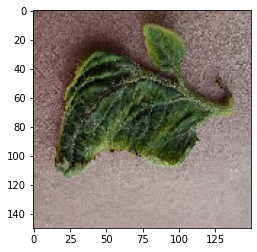

1/1 [==============================] - 0s 15ms/step
[[7.7650944e-22 1.1222619e-12 8.0116894e-19 9.9999774e-01 2.3000964e-06
  2.9209796e-17 8.0859669e-14 6.2495972e-23 4.1238399e-21 1.4517401e-14]]
This is : Leaf_Mold


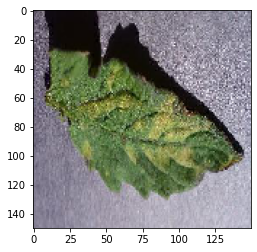

1/1 [==============================] - 0s 16ms/step
[[3.96953686e-17 3.79380498e-16 1.31164936e-12 1.41321406e-12
  1.05759271e-12 9.99999762e-01 1.56044962e-07 3.66507199e-13
  1.06548270e-09 1.05531235e-07]]
This is : Spider_mites Two-spotted_spider_mite


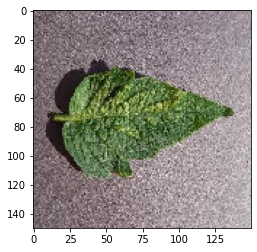

1/1 [==============================] - 0s 15ms/step
[[1.1546950e-16 5.9652608e-16 7.8636583e-11 2.4462921e-14 1.1541315e-12
  9.9999976e-01 3.4523218e-09 6.5446763e-12 5.2168838e-09 1.8386554e-07]]
This is : Spider_mites Two-spotted_spider_mite


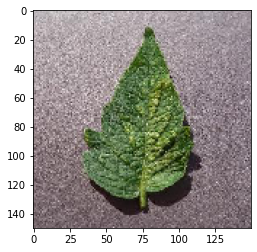

1/1 [==============================] - 0s 18ms/step
[[4.3486604e-14 8.1655321e-11 4.5909088e-15 1.4276663e-10 1.3258862e-08
  2.5061144e-07 1.3924840e-10 1.0601805e-07 9.9999964e-01 1.4626028e-16]]
This is : Tomato_mosaic_virus


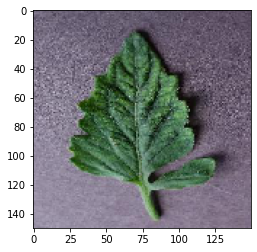

1/1 [==============================] - 0s 23ms/step
[[7.6396184e-25 6.8762406e-20 5.2249756e-09 9.9929535e-01 7.0463488e-04
  0.0000000e+00 2.5160805e-25 6.8707366e-27 1.7705679e-32 5.1779282e-25]]
This is : Leaf_Mold


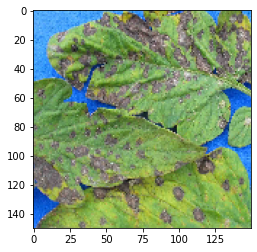

1/1 [==============================] - 0s 22ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
This is : Late_blight


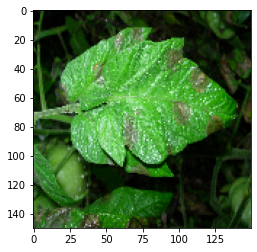

1/1 [==============================] - 0s 22ms/step
[[7.5815075e-28 3.5919334e-22 8.7787680e-16 1.4462358e-13 1.6699666e-12
  1.9836957e-18 2.2306221e-11 3.2778374e-29 5.4360210e-21 1.0000000e+00]]
This is : healthy


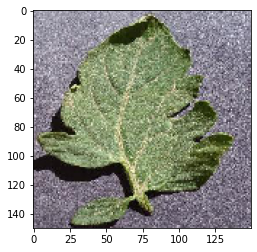

1/1 [==============================] - 0s 15ms/step
[[8.22138852e-14 6.39708730e-10 8.83154929e-01 7.62457920e-23
  2.66801210e-20 1.13900669e-01 1.60172953e-19 2.94437027e-03
  1.07142324e-27 1.01418756e-25]]
This is : Late_blight


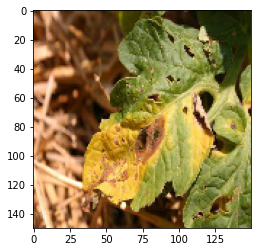

1/1 [==============================] - 0s 18ms/step
[[5.89436352e-01 4.10217911e-01 3.33944400e-10 3.32350730e-10
  3.35460296e-04 9.91063065e-16 8.39196984e-13 1.02264885e-05
  2.52056695e-21 3.83697461e-21]]
This is : Bacterial


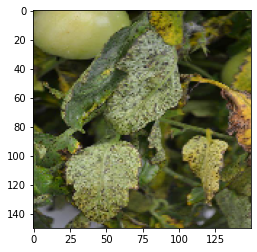

In [ ]:
test="/content/drive/MyDrive/Colab Notebooks/data/cachua/tomato_test"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_h5.predict(img)
  class_name=['Bacterial','Early_blight','Late_blight','Leaf_Mold','Septoria_leaf_spot',
            'Spider_mites Two-spotted_spider_mite','Tomato___Target_Spot',
            'Tomato___Tomato_Yellow_Leaf_Curl_Virus','Tomato_mosaic_virus',
            'healthy']
  print(model.predict(img))
  a= int(np.argmax(result,axis=1))
  print("This is :", class_name[a])
  plt.show()

In [ ]:
! jupyter nbconvert --to html /content/AINgoc.ipynb

[NbConvertApp] Converting notebook /content/AINgoc.ipynb to html
[NbConvertApp] Writing 1692651 bytes to /content/AINgoc.html
